In [ ]:
!pip install --upgrade seaborn statsmodels
import os
!pip3 install tensorflow

# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
import os

# Montar Google Drive
drive.mount('/content/drive')

# Cambiar al directorio donde se encuentra el dataset
dataset_path = '/content/drive/My Drive/ESPECIALITZACIÓ/IA/PROYECTOS/Proyecto2/Elementos'
os.listdir(dataset_path)  # Verifica los archivos en el directorio

Mounted at /content/drive


['readme.md',
 'Lexique - Data Analyst.xlsx',
 'extract - cash request - data analyst.csv',
 'extract - fees - data analyst - .csv']

In [ ]:
# Cargar el dataset principal de solicitudes de adelanto en efectivo
cash_request = pd.read_csv('/content/drive/MyDrive/ESPECIALITZACIÓ/IA/PROYECTOS/Proyecto2/Elementos/extract - cash request - data analyst.csv')
# Inspeccionar la estructura y el tipo de datos de 'cash_request'
data = cash_request
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [ ]:
cash_request=pd.read_csv('/content/drive/MyDrive/ESPECIALITZACIÓ/IA/PROYECTOS/Proyecto2/Elementos/extract - cash request - data analyst.csv')
fees=pd.read_csv('/content/drive/MyDrive/ESPECIALITZACIÓ/IA/PROYECTOS/Proyecto2/Elementos/extract - fees - data analyst - .csv')

In [ ]:
plt.figure(figsize=(10, 8))
fig1 = px.imshow(cash_request.isnull(),
 color_continuous_scale=['black', 'red'],
 labels=dict(color="NaN"),
 title="Mapa de calor para cash_request")
fig1.update_layout(width=700, height=700)
fig1.update_coloraxes(showscale=False)
fig1.show()

<Figure size 1000x800 with 0 Axes>

In [ ]:
fig2 = px.imshow(fees.isnull(),
 color_continuous_scale=['black', 'red'],
 labels=dict(color="NaN"),
 title="Mapa de calor para fees")
fig2.update_layout(width=700, height=700)
fig2.update_coloraxes(showscale=False)
fig2.show()

In [ ]:
cash_request.describe()

id        amount        user_id  deleted_account_id
count  23970.000000  23970.000000   21867.000000         2104.000000
mean   13910.966124     82.720818   32581.250789         9658.755228
std     7788.117214     26.528065   27618.565773         7972.743249
min        3.000000      1.000000      34.000000           91.000000
25%     7427.250000     50.000000   10804.000000         3767.000000
50%    14270.500000    100.000000   23773.000000         6121.500000
75%    20607.750000    100.000000   46965.000000        16345.000000
max    27010.000000    200.000000  103719.000000        30445.000000

In [ ]:
fees.describe()

id  cash_request_id  total_amount
count  21061.000000     21057.000000  21061.000000
mean   10645.355111     16318.449162      5.000237
std     6099.315256      6656.149949      0.034453
min        1.000000      1456.000000      5.000000
25%     5385.000000     11745.000000      5.000000
50%    10652.000000     17160.000000      5.000000
75%    15925.000000     21796.000000      5.000000
max    21193.000000     27010.000000     10.000000

In [ ]:
 cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [ ]:
 fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


# **Revisión de columnas con valores clave**

In [ ]:
columnas_cash_request=cash_request.columns.tolist()
for i in columnas_cash_request:
  print("===========================")
  print(f"{cash_request[i].value_counts().head(10)}")

id
5        1
15322    1
19569    1
15338    1
15329    1
15341    1
15336    1
15334    1
15165    1
15346    1
Name: count, dtype: int64
amount
100.0    16094
50.0      5304
25.0      1276
80.0       267
60.0       190
70.0       151
20.0       132
30.0       114
40.0       100
90.0        91
Name: count, dtype: int64
status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64
created_at
2019-12-10 19:05:21.596873+00    1
2020-09-09 11:06:31.382449+00    1
2020-10-07 05:56:54.442506+00    1
2020-09-09 12:32:29.661278+00    1
2020-09-09 11:42:31.956338+00    1
2020-09-09 12:43:05.909299+00    1
2020-09-09 12:23:09.95394+00     1
2020-09-09 12:16:17.993242+00    1
2020-09-08 16:01:25.146577+00    1
2020-09-09 12:57:42.599222+00    1
Name: count, dtype: int64
updated_at
2019-12-11 16:47:42.40783+00  

In [ ]:
 columnas_fees=fees.columns.tolist()
 for i in columnas_fees:
  print("===========================")
  print(f"{fees[i].value_counts().head(10)}")

id
6537    1
7852    1
7846    1
7844    1
6968    1
7819    1
7816    1
7815    1
9183    1
7814    1
Name: count, dtype: int64
cash_request_id
12225.0    35
5006.0     28
4410.0     24
12452.0    23
11376.0    21
2358.0     19
11746.0    17
15319.0    16
4956.0     15
8713.0     15
Name: count, dtype: int64
type
instant_payment    11099
postpone            7766
incident            2196
Name: count, dtype: int64
status
accepted     14841
cancelled     4938
rejected      1194
confirmed       88
Name: count, dtype: int64
category
rejected_direct_debit     1599
month_delay_on_payment     597
Name: count, dtype: int64
total_amount
5.0     21060
10.0        1
Name: count, dtype: int64
reason
rejected direct debit               1599
month delay on payment - 9/2020      283
month delay on payment - 8/2020      203
month delay on payment - 10/2020     102
Postpone Cash Request 12225           34
Postpone Cash Request 5006            25
Postpone Cash Request 4410            23
Postpone Cash Re

# **Visualización de distribuciones de datos**

In [ ]:
columnas_numericas_cash_request=cash_request.describe().columns.tolist()
for c in columnas_numericas_cash_request:
  fig = px.histogram(cash_request, x=c, title=f'Histograma de {c}')
  fig.update_layout(height=500)
  fig.show()

In [ ]:
columnas_numericas_fees=fees.describe().columns.tolist()
for c in columnas_numericas_fees:
 fig = px.histogram(fees, x=c, title=f'Histograma de {c}')
 fig.update_layout(height=500)
 fig.show()

In [ ]:
for c in columnas_cash_request:
 if c not in columnas_numericas_cash_request:
  counts = cash_request[c].value_counts()
  if len(counts)<=10:
    fig = px.pie(names=counts.index, values=counts.values, title=f'Distribución de {c}')
    fig.update_layout(height=500)
    fig.show()

# **Identificación de valores atípicos**

In [ ]:
for c in columnas_numericas_cash_request:
 fig = px.box(cash_request, y=c, title=f'Boxplot de {c}')
 fig.update_layout(height=500)
 fig.show()

In [ ]:
for c in columnas_numericas_fees:
 fig = px.box(fees, y=c, title=f'Boxplot de {c}')
 fig.update_layout(height=500)
 fig.show()

## **Grafica de violin Cash Request**

In [ ]:
for c in columnas_numericas_cash_request:
 fig = px.violin(cash_request, y=c, title=f'Violinplot de {c}')
 fig.update_layout(height=500)
 fig.show()

## **Grafica de violin Fees**

In [ ]:
for c in columnas_numericas_fees:
 fig = px.violin(fees, y=c, title=f'Violinplot de {c}')
 fig.update_layout(height=500)
 fig.show()

# **Obtener gráficos de dispersión**

In [ ]:
# Genera gráficos de dispersión para todas las combinaciones de columnas numéricas
for c1, c2 in itertools.combinations(columnas_numericas_cash_request, 2):
  fig = px.scatter(cash_request, x=c1, y=c2, title=f'Gráfico de dispersión de {c1} vs {c2}')
  fig.update_layout(height=500)
  fig.show()

In [ ]:
# Genera gráficos de dispersión para todas las combinaciones de columnas numéricas
for c1, c2 in itertools.combinations(columnas_numericas_fees, 2):
 fig = px.scatter(fees, x=c1, y=c2, title=f'Gráfico de dispersión de {c1} vs {c2}')
 fig.show()

# **Obtener gráficos de dispersión con línea de regresión (Tendencia)**

In [ ]:
# Genera gráficos de dispersión con línea de tendencia para todas las combinaciones de columnas numéricas
for c1, c2 in itertools.combinations(columnas_numericas_cash_request, 2):
 fig = px.scatter(cash_request, x=c1, y=c2,
  title=f'Gráfico de dispersión de {c1} vs {c2} con línea de tendencia', trendline="ols") # Agregar línea de tendencia (OLS)
 # Cambiar el color de la línea de tendencia a rojo
 fig.update_traces(line=dict(color='red', width=3)) # Color y ancho de la línea de tendencia
 fig.update_traces(line=dict(color='red'), selector=dict(mode='lines')) # Cambiar el color de la línea de tendencia
 fig.update_layout(height=500)
 fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import itertools
import plotly.express as px

# Reemplaza 'fees' con el nombre de tu DataFrame y 'columnas_numericas_fees' con tus columnas numéricas.
for c1, c2 in itertools.combinations(columnas_numericas_fees, 2):
    fig = px.scatter(
        fees,
        x=c1,
        y=c2,
        title=f'Gráfico de dispersión de {c1} vs {c2} con línea de tendencia',
        trendline="ols",  # Agregar línea de tendencia (OLS)
        log_x=True,  # Escalar eje X en log10
        log_y=True   # Escalar eje Y en log10
    )
    # Cambiar el color de la línea de tendencia a rojo
    fig.update_traces(line=dict(color='red', width=3), selector=dict(mode='lines'))
    fig.update_layout(height=500)
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Genera gráficos de dispersión con línea de tendencia para todas las combinaciones de columnas numéricas
for c1, c2 in itertools.combinations(columnas_numericas_fees, 2):
 fig = px.scatter(fees, x=c1, y=c2, title=f'Gráfico de dispersión de {c1} vs {c2} con línea de tendencia', trendline="ols") # Agregar línea de tendencia (OLS)
 # Cambiar el color de la línea de tendencia a rojo
 fig.update_traces(line=dict(color='red', width=3)) # Color y ancho de la línea de tendencia
 fig.update_traces(line=dict(color='red'), selector=dict(mode='lines')) #Cambiar el color de la línea de tendencia
 fig.update_layout(height=500)
 fig.show()

Output hidden; open in https://colab.research.google.com to view.

# **Obtencón de graficos en descomposición de serie temporal**

## cash request

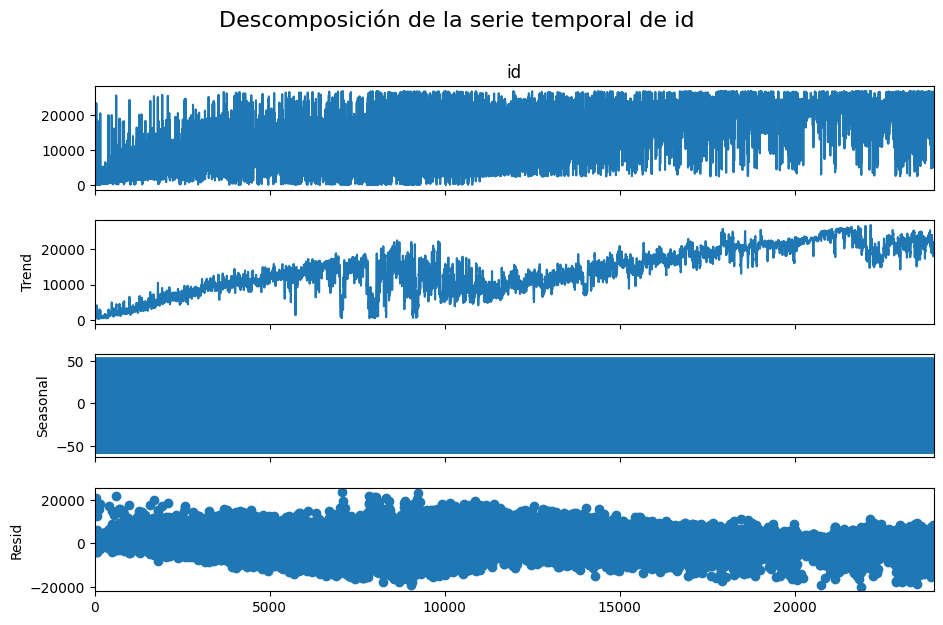

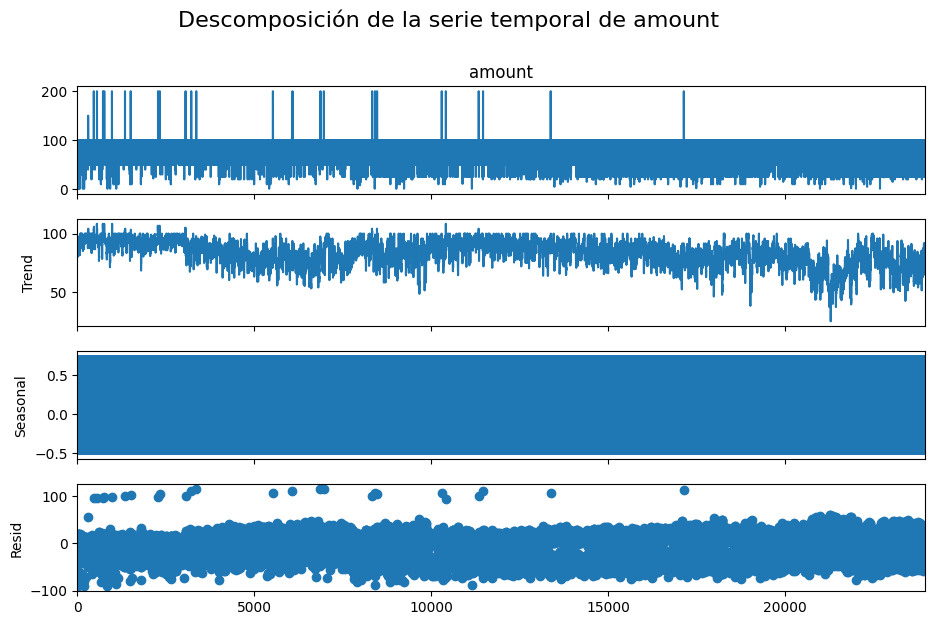

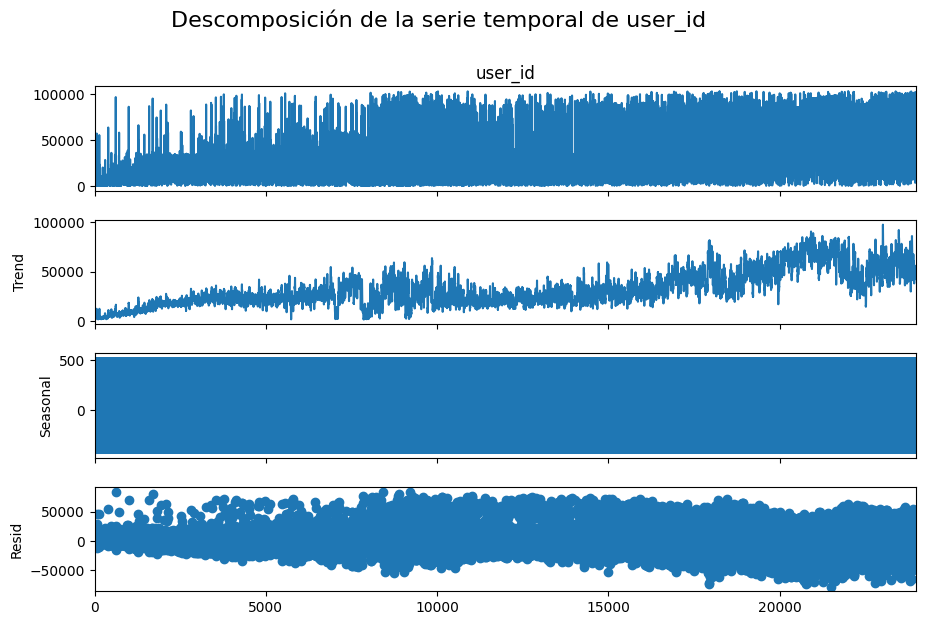

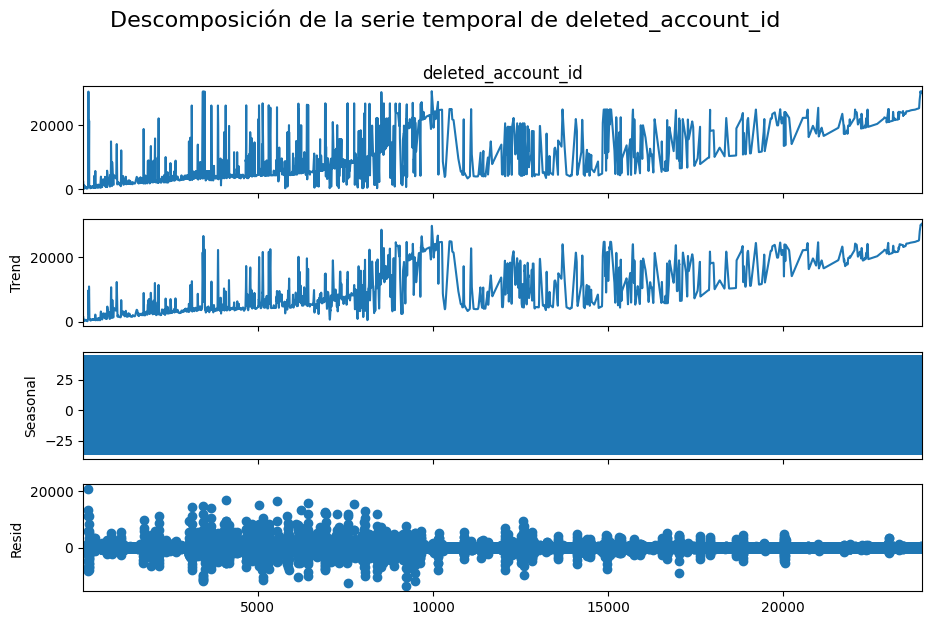

In [ ]:
# Descomposición de series temporales para cada columna numérica individual
for c in columnas_numericas_cash_request:
 # Crear una copia del DataFrame para trabajar
 cash_request_copy = cash_request[c].copy()
 # Verifica si hay valores faltantes y elimínalos o interpola
 if cash_request_copy.isnull().any():
  cash_request_copy = cash_request_copy.interpolate() # Rellenar NaN con interpolación
 # Eliminar filas con valores faltantes
 cash_request_copy = cash_request_copy.dropna()
 # Verificar que no hay valores no finitos
 if not np.isfinite(cash_request_copy).all():
  print(f'La columna {c} contiene valores no finitos, se omite la descomposición.')
  continue
 # Descomposición de la serie temporal
 descomposicion = seasonal_decompose(cash_request_copy, model='additive', period=12)
 # Graficar la descomposición
 fig = descomposicion.plot()
 # Ajustar el tamaño de la figura con matplotlib

 plt.gcf().set_size_inches(10, 6)
 # Ajustar el título para que no se superponga
 fig.suptitle(f'Descomposición de la serie temporal de {c}', fontsize=16, y=1.05)
 plt.show()

## Fees

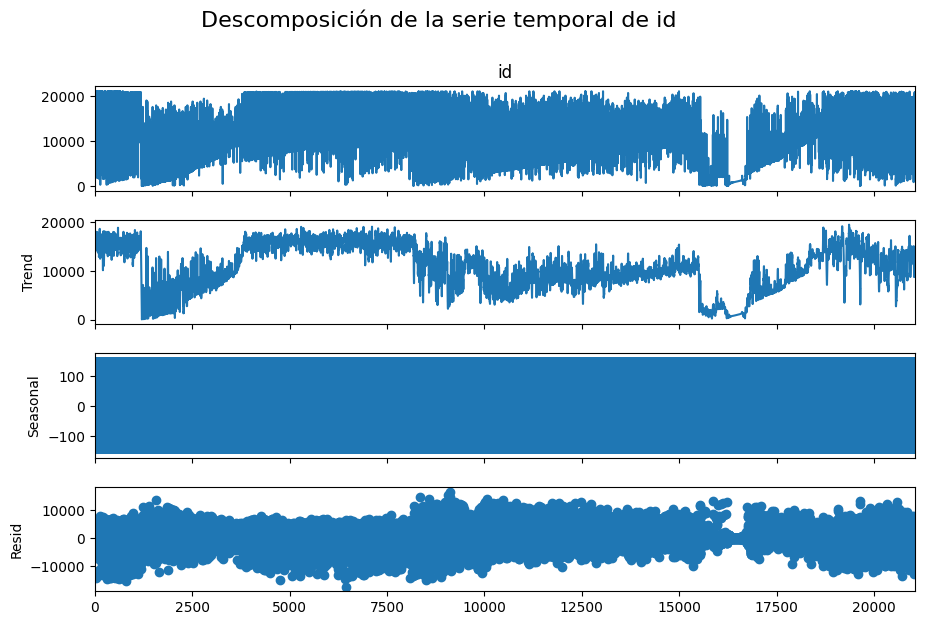

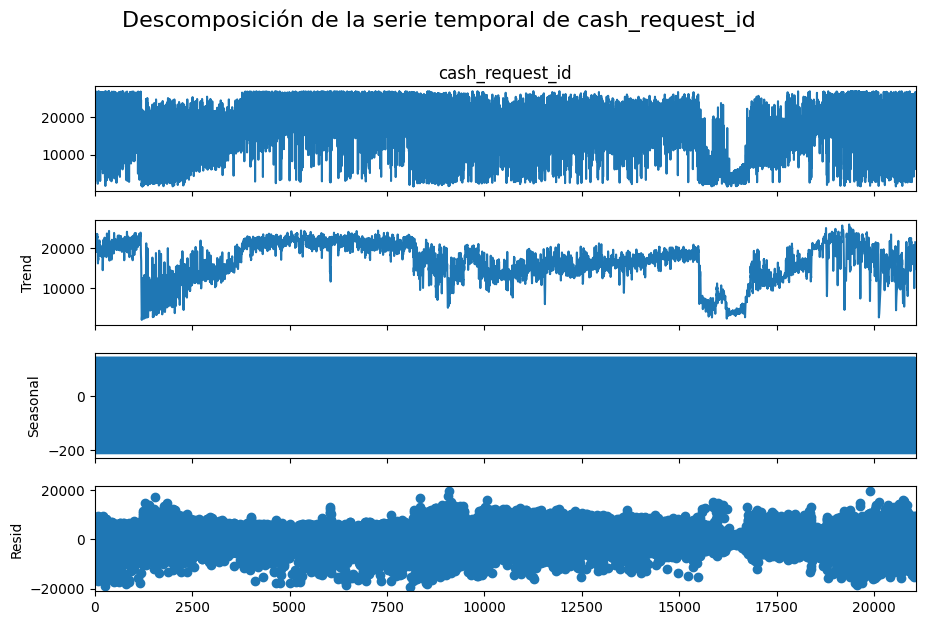

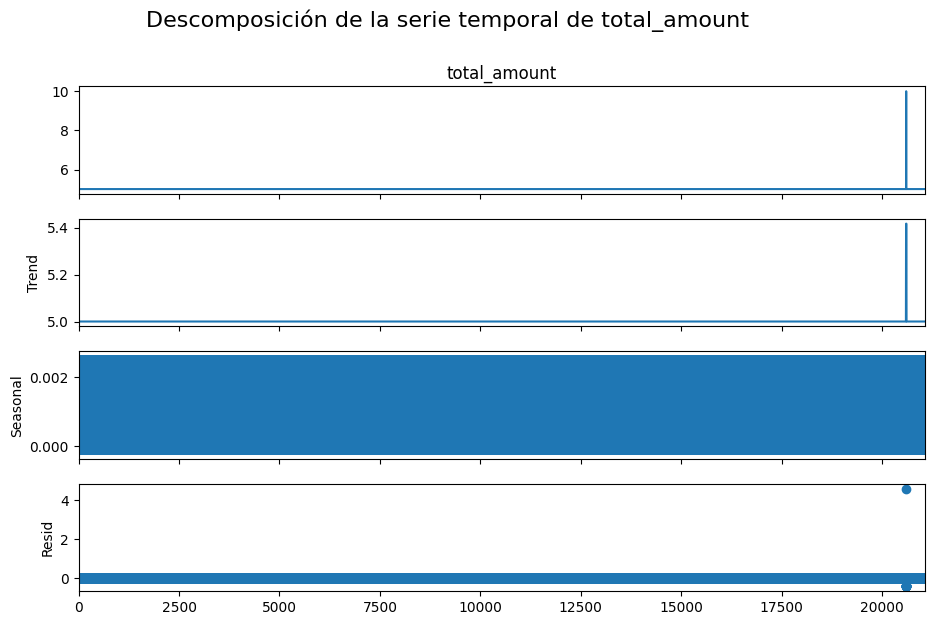

In [ ]:
# Descomposición de series temporales para cada columna numérica individual
for c in columnas_numericas_fees:
 # Crear una copia del DataFrame para trabajar
 fees_copy = fees[c].copy()
 # Verifica si hay valores faltantes y elimínalos o interpola
 if fees_copy.isnull().any():
  fees_copy = fees_copy.interpolate() # Rellenar NaN con interpolación
 # Eliminar filas con valores faltantes
 fees_copy = fees_copy.dropna()

 # Verificar que no hay valores no finitos
 if not np.isfinite(fees_copy).all():
  print(f'La columna {c} contiene valores no finitos, se omite la descomposición.')
  continue
 # Descomposición de la serie temporal
 descomposicion = seasonal_decompose(fees_copy, model='additive', period=12)
 # Graficar la descomposición
 fig = descomposicion.plot()

 # Ajustar el tamaño de la figura con matplotlib
 plt.gcf().set_size_inches(10, 6) #
 # Ajustar el título para que no se superponga
 fig.suptitle(f'Descomposición de la serie temporal de {c}', fontsize=16, y=1.05)
 plt.show()